<a href="https://colab.research.google.com/github/Priy-Sharma/Predictive-Maintenance-of-milling-machine/blob/main/Predicitve_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Maintenance for Milling Machine**



---
**Objective:**
To reduce the high maintenance costs of milling machines and to predict machine failures before they occur.


---
**Data Source:**
https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification


---
**Features:**

This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 10 features in columns

***UID:*** unique identifier ranging from 1 to 10000

***product ID:*** consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number


***type:*** just the product type L, M or H from column 2

***air temperature [K]:*** generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.

***process temperature [K]:*** generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

***rotational speed [rpm]:*** calculated from a power of 2860 W, overlaid with a normally distributed noise

***torque [Nm]:*** torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.

***tool wear [min]:*** The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes

**Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage**


 ***Target:*** Failure or Not

***Failure Type:*** Type of Failure


In [ ]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
maintenance_path = '/content/drive/MyDrive/maintenance_project/predictive_maintenance.csv'

In [ ]:
# importing the necessary libraries for data manipulation graph visualization and
import pandas as pd
import numpy as np

# Necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read the csv(comma separated value) file
df = pd.read_csv(maintenance_path)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
# Shape of dataframe
df.shape

(10000, 10)

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
# Information of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


---

***Observations***

From the info(), it seems like all the features have the correct data types. However, for cross-verification, we will run the code to check the unique values.

In [ ]:
for col in df.columns:
  print(df[col].unique())
  print("-"*10)

[    1     2     3 ...  9998  9999 10000]
----------
['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
----------
['M' 'L' 'H']
----------
[298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]
----------
[308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7
 306.6 306.5 306.4 306.3 306.2 306.1 306.  305.9 305.8 3

In [ ]:
# Check NULL/ NAN values
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
# Check duplicate values
df.duplicated().sum()

0

In [ ]:
# Value count for target column
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

---

***Observations:***

The data doesn't contain any duplicated records.

The data seems to be unbalnced. We will balance the data for the model building using synthetic minority oversampling technique **(SMOTE).**


# EDA (Exploratory Data Analysis)

In [ ]:
# Describe numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


---

*** Obeservations:***
<ul>
<li> For the "Process Temperature [K], mean and median(50%) are somewhat close indicating that the distribution is nearly symmetric with a standard deviation of 1.48. </li>

 <li>The Standard deviation for "Rotational speed [rpm] is more than other features indiacting that the distribution is right skewed. </li>

 <li>Mean and median for the "Tool Wear [min]" is the same indicating that the distribution is symmetric. For 75% of the data tool wear [min] falls in the range 0 minute to 165 minute.</li>
 </ul>

In [ ]:
# Describe object type columns
df.describe(include = ["O"]).T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure Type,10000,6,No Failure,9652


---

***Observations:***
<ul> <li>Type 'L' is most frequently occuring type with 6000 entries.</li>

 <li>Data has 10000 records out of those 9652 records having "No Failure" as Failure type. </li> </ul>

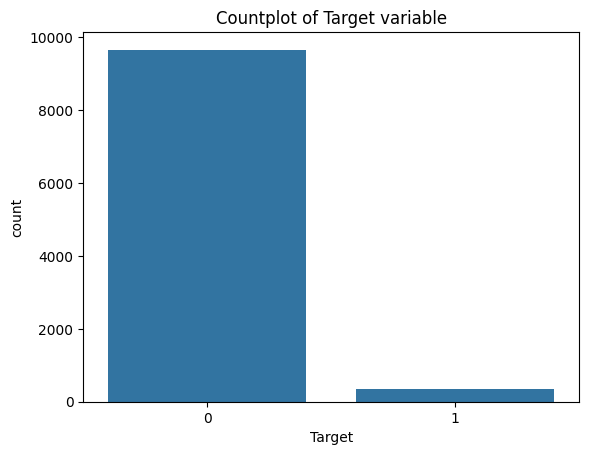

In [ ]:
# Distibution of data
plt.title("Countplot of Target variable")
sns.countplot(df, x = 'Target')
plt.show()

---

***Observations***
<ul>
<li>From the bar plot it is clear that the data is highly imbalanced for it's target column. </li>
</ul>

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

# Outlier Detection

Text(0.5, 1.0, 'Histplot for Air temperature [K]')

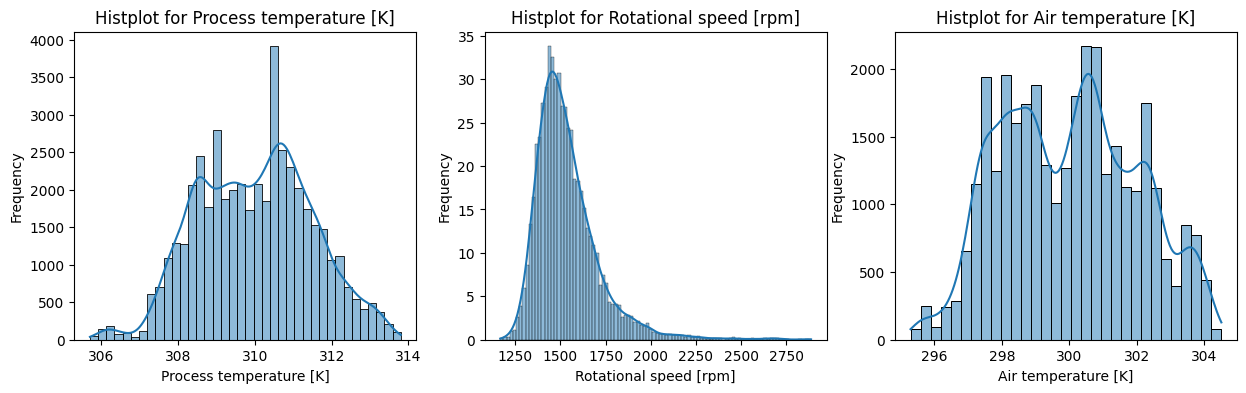

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(1,3,1)
sns.histplot(df, x = 'Process temperature [K]', stat='frequency', kde = True)
plt.title("Histplot for Process temperature [K]")

plt.subplot(1,3,2)
sns.histplot(df, x = 'Rotational speed [rpm]', stat='frequency', kde = True)
plt.title("Histplot for Rotational speed [rpm]")

plt.subplot(1,3,3)
sns.histplot(df, x = 'Air temperature [K]', stat='frequency', kde = True)
plt.title("Histplot for Air temperature [K]")

---

***Observations:***
<ul>
<li>A histogram is an important plot for detecting outliers and understanding the skewness of the data.</li>

<li>From the plot, it shows that the rotational speed has a right-skewed distribution, indicating that there are some outliers in this column.</li>
</ul>

# Distributuion of columns based on Failure type.

**Important**


The dataset contains 10,000 rows, out of which 6,000 rows show 'No Failure' in the 'Failure Type' column. We will plot the sns.FacetGrid by removing these records to obtain a clearer representation of the distribution of other failure types.


In [ ]:
df_filtered = df[df['Failure Type'] != 'No Failure']

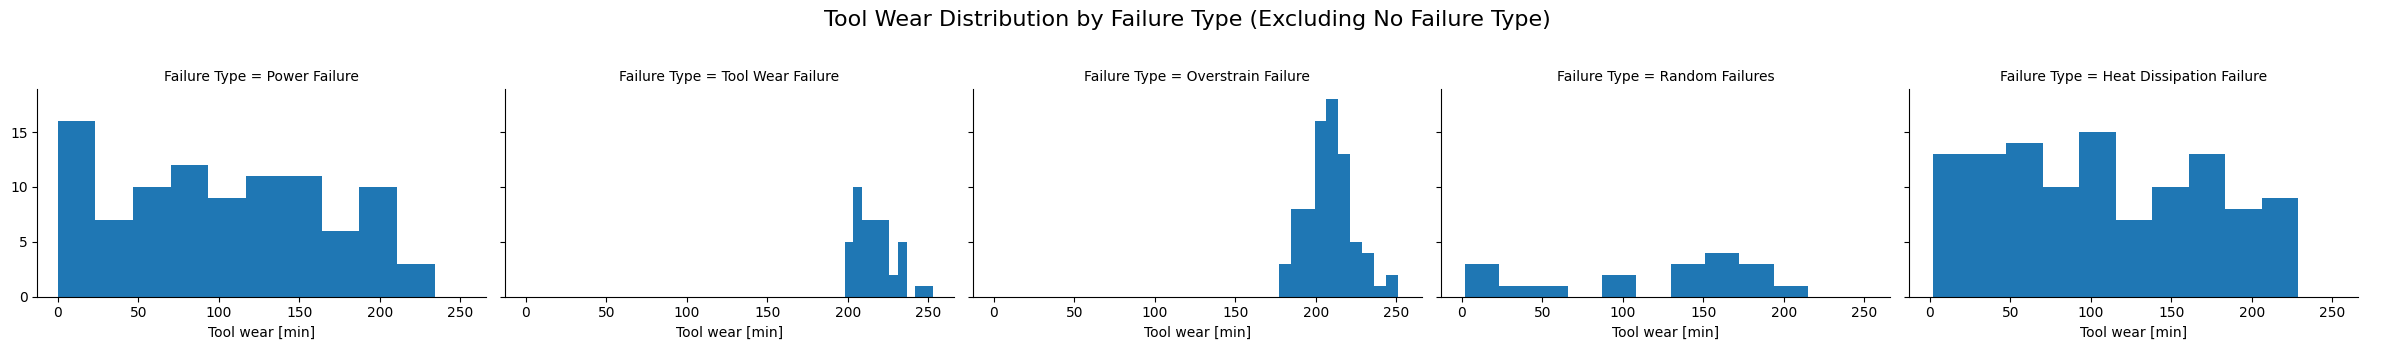

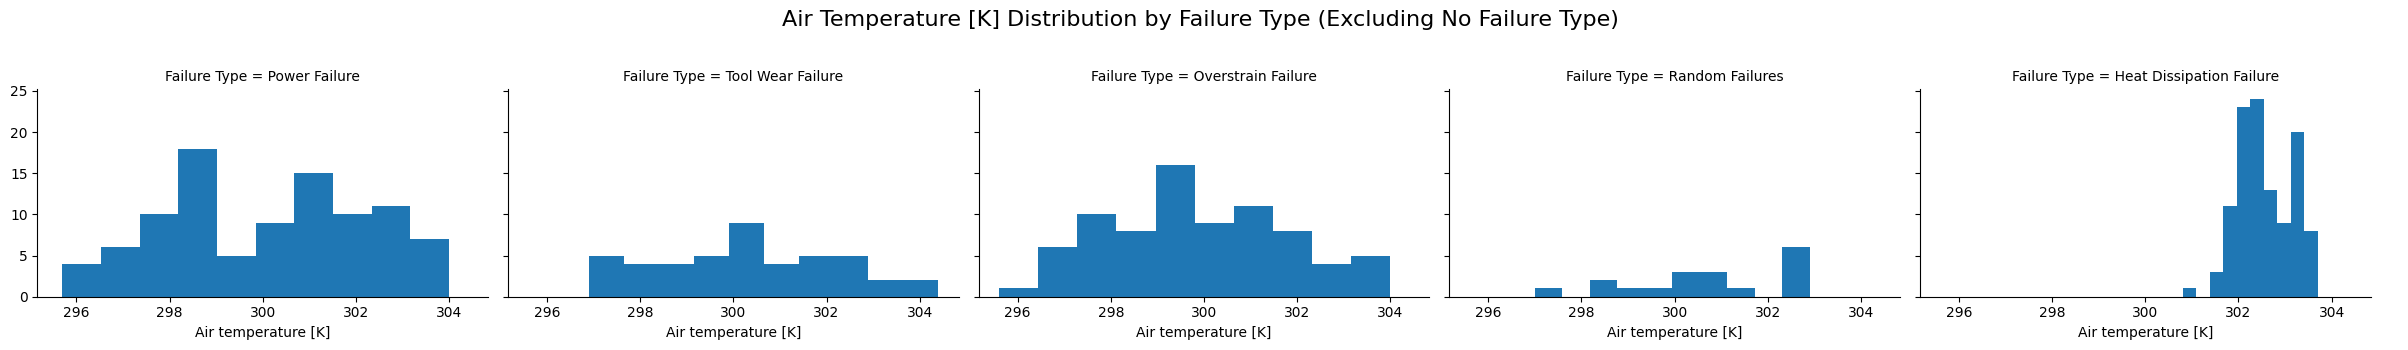

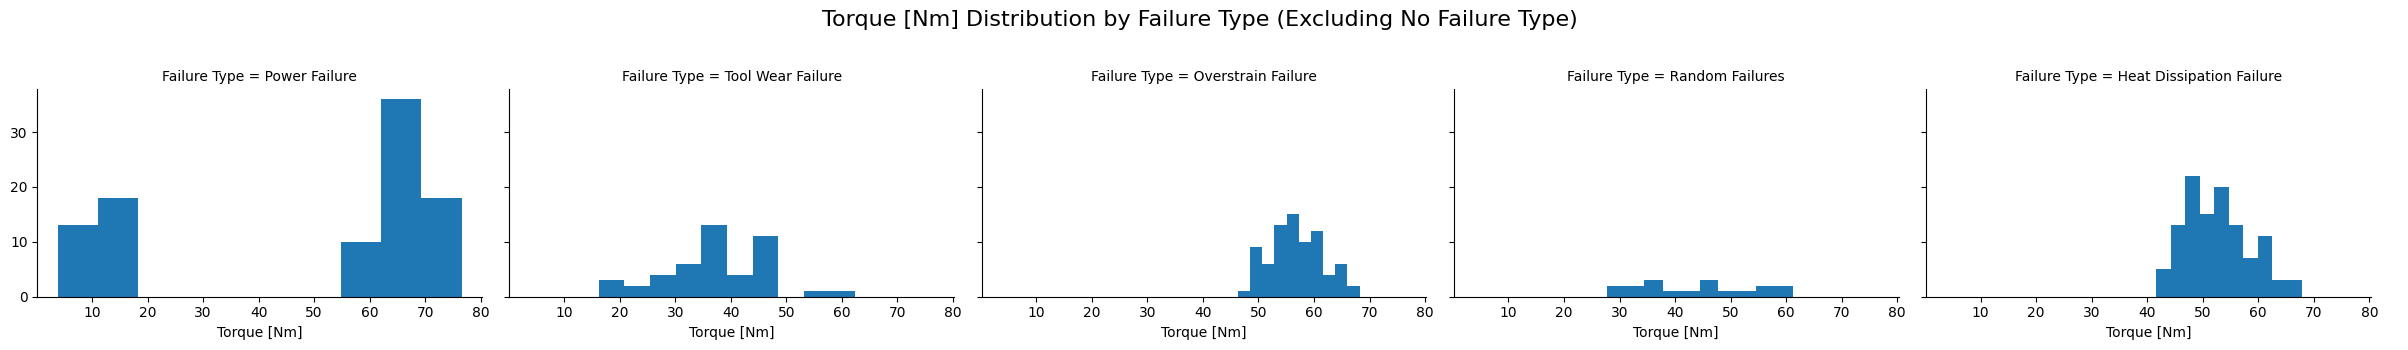

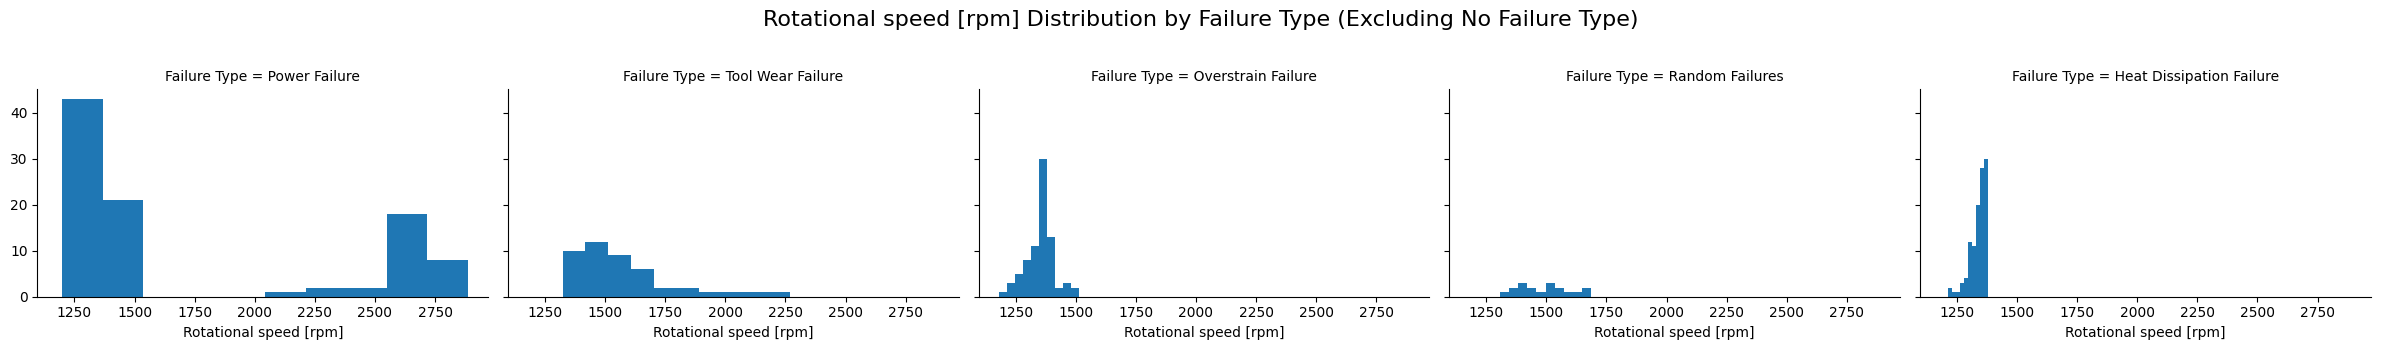

In [ ]:

grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Tool wear [min]")
grid.add_legend()
grid.fig.suptitle("Tool Wear Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)


grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Air temperature [K]")
grid.add_legend()
grid.fig.suptitle("Air Temperature [K] Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)


grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Torque [Nm]")
grid.add_legend()
grid.fig.suptitle("Torque [Nm] Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)


grid = sns.FacetGrid(df_filtered, col='Failure Type', aspect=1.6)
grid.map(plt.hist, "Rotational speed [rpm]")
grid.add_legend()
grid.fig.suptitle("Rotational speed [rpm] Distribution by Failure Type (Excluding No Failure Type)", y=1.15, fontsize =16)

plt.show()

---

***Observations:***

<li> <b>Tool Wear Distribution by Failure Type (Excluding No Failure Type):</b>
<p>From the second and third graphs in the first row, it's clear that  when tool wear exceeds 200 minutes there is a tool wear failure, and more than 15 time the overstrain failure is the result when tool wear is 210 to 220 minutes. However, there is no clear relationship between power failure, random failure, and heat dissipation failure with tool wear (in minutes).
</p></li>

<li><b>Air Temperature [K] Distribution by Failure Type (Excluding No Failure Type)</b>
<p>From the fifth graph it is clear that the when the air temperature exceeds the 301 kelvin there is high probability of heat dissipation failure to occur. </p></li>

<li><b>Torque [Nm] Distribution by Failure Type (Excluding No Failure Type)</b>
<p>From the graphs, it is clear that if the torque is less than 20 Nm or more than 55 Nm, power failure occurs. The graph shows the highest peak for power failure when the torque is 60 Nm. There is also a probability of overstrain failure if the torque exceeds 50 Nm. The last graph shows that if the torque exceeds 40 Nm, there is a chance of heat dissipation failure.</p></li>

<li><b>Rotational speed [rpm] Distribution by Failure Type (Excluding No Failure Type)</b>
<p> Minimum or higher rotational speeds indicate a probability of power failure. From the third graph, it is clear that the more than 30 times overstrain failure occurred when the rotational speed was between 1350 to 1400 rpm. </p></li>

<b>These conclusions are drawn from the sns.FacetGrid graphs
</b>







# Box plot

A box plot (or box-and-whisker plot) is essential for several reasons:

**Identifying Outliers:** Box plots help detect outliers in the data, which can be critical for maintaining the integrity of the model.


**Understanding Distribution:** They provide a visual summary of the distribution of a dataset, showing the median, quartiles, and potential outliers.

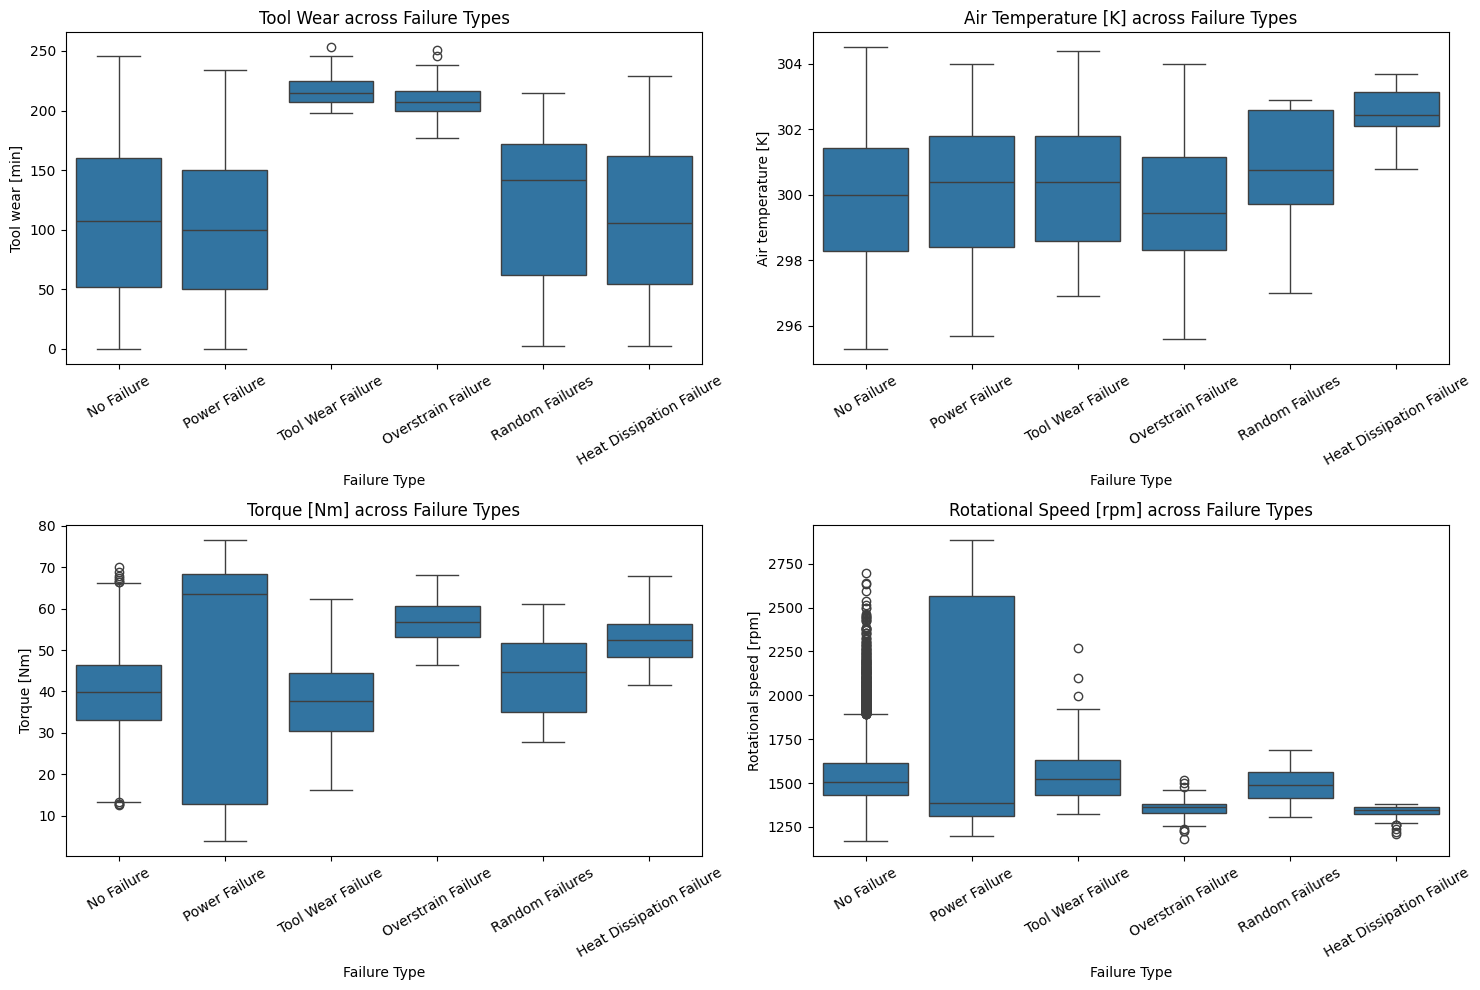

In [ ]:
# Create a 2x2 grid of plots
plt.figure(figsize=(15, 10))

# First plot (top-left)
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Failure Type', y='Tool wear [min]')
plt.title('Tool Wear across Failure Types')
plt.xticks(rotation=30)

# Second plot (top-right)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Failure Type', y='Air temperature [K]')
plt.title('Air Temperature [K] across Failure Types')
plt.xticks(rotation=30)

# Third plot (bottom-left)
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Failure Type', y='Torque [Nm]')
plt.title('Torque [Nm] across Failure Types')
plt.xticks(rotation=30)

# Fourth plot (bottom-right)
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Failure Type', y='Rotational speed [rpm]')
plt.title('Rotational Speed [rpm] across Failure Types')
plt.xticks(rotation=30)

# Display all plots
plt.tight_layout()
plt.show()


## Correlation Analysis

Correlation analysis is crucial for understanding the dependencies between variables. In this analysis, we observe that the input features should not be multicollinear with each other, and the output feature should be collinear with the input features.

**Important Note:**



1.   A correlation value of 1 indicates that the features are highly collinear with a positive relationship.
2.   A correlation value of 0 means there is no collinearity between the features.
3.  A correlation value of -1 indicates that the features are collinear with a negative relationship.

Understanding these relationships helps in selecting the most relevant features and avoiding multicollinearity, which can adversely affect the performance of the predictive model.





In [ ]:
df1 = df.copy()

In [ ]:
obj_list = list(df1.select_dtypes("object"))

In [ ]:
obj_list

['Product ID', 'Type', 'Failure Type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in obj_list:
  le = LabelEncoder()
  df1[col] = le.fit_transform(df1[col])

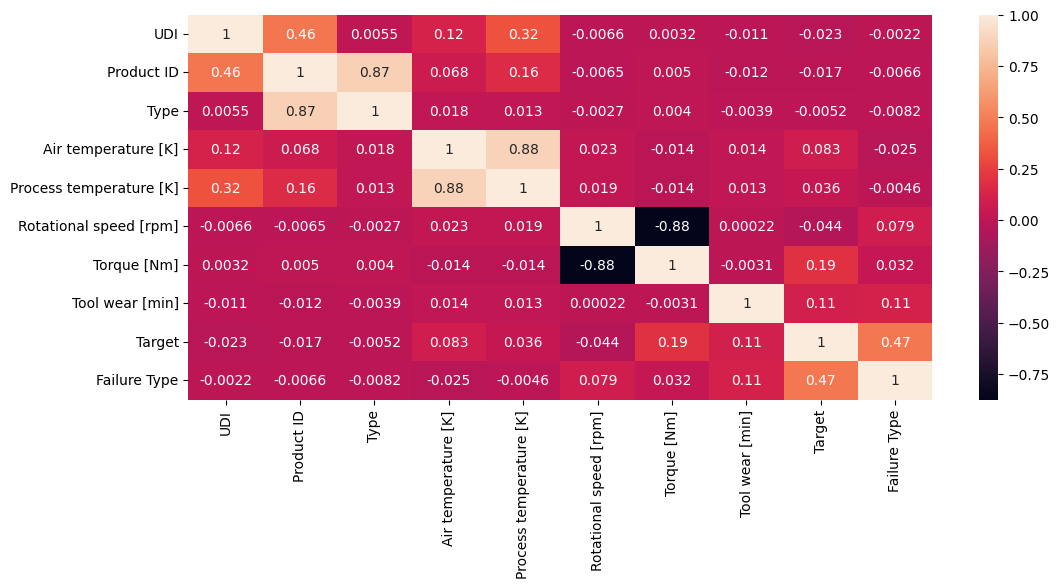

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(df1.corr(), annot = True)
plt.show()

---

***Observations:***

<b> We will consider the `Target` column as our output feature while the remaining columns except `Failure Type` as input features. </b>
<ul>
<li>From the above correlation graph it is clear that there is the very weak correlation of Failure Type with UDI, Product ID, Type, and Process temperature. </li>
<li> The features Product Id, Type and Process Temperature, Air temperature has very high correlations. </li>
<li> Rotational Speed and Torque also have strong negative correlation.
</ul>


In [ ]:
df1.drop(columns = ['UDI', 'Product ID', 'Type', 'Failure Type'], inplace =True)

---

***Explaination:***

The output column 'Target' has very minimal correlation with 'UDI' and 'Product_ID'; therefore, we will drop these columns. Additionally, we will drop the 'Failure_Type' column to prevent data leakage in our model.

# Scatterplot between the features

Creating scatterplots is essential to understand the relationships between different features in the dataset. Scatterplots help visualize the correlation between pairs of features, identify potential patterns, and detect any outliers or anomalies. This information is crucial for feature selection, engineering, and improving the overall performance of the predictive model.



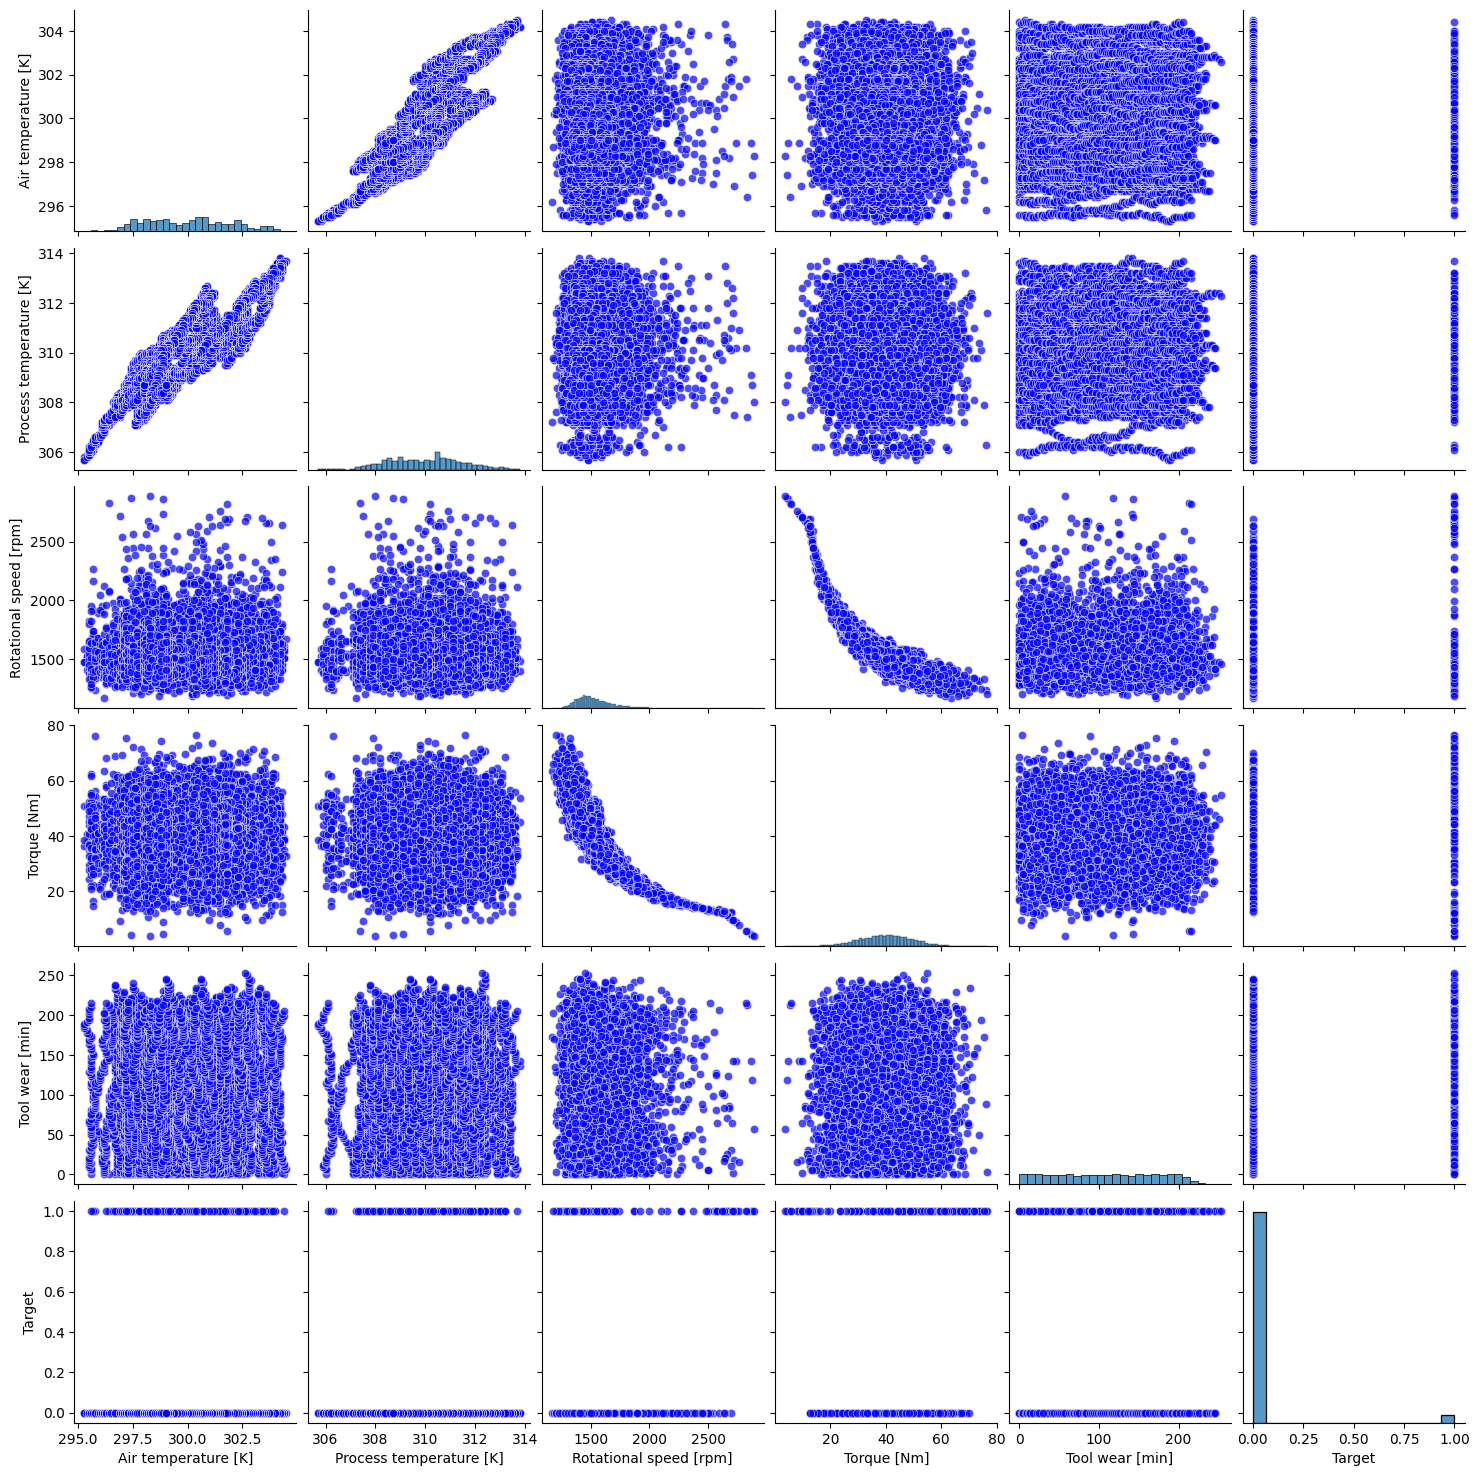

In [ ]:
sns.pairplot(df1, plot_kws={'alpha': 0.7, 'color': 'blue'})

---

***Observations:***
<ul>
<li> By observing the scatter plot of the target feature with other input features it is clear that the problem is the classification problem with two classes 0 and 1. </li> </ul>

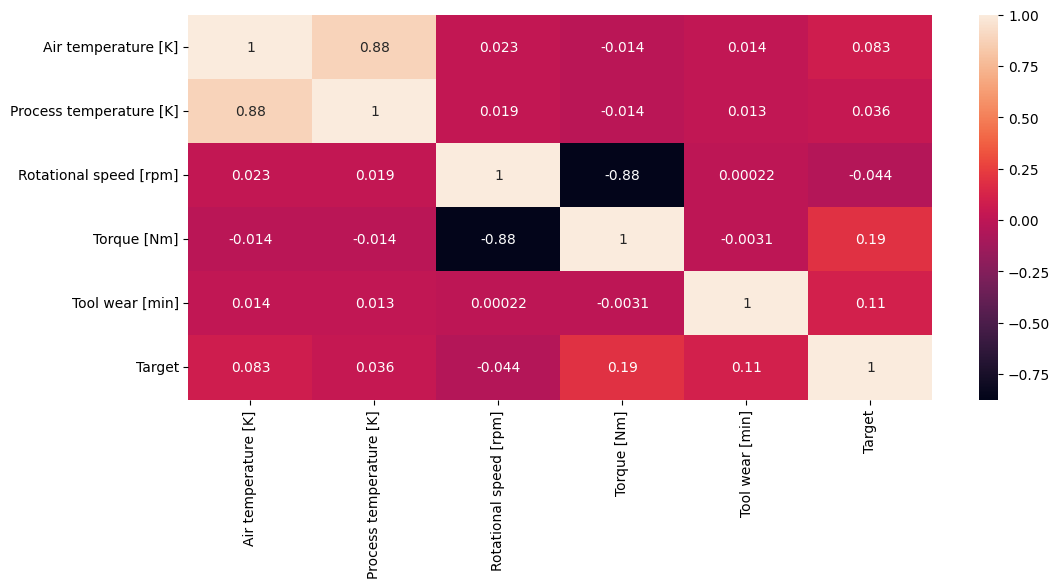

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [ ]:
df2 = df1.copy()

In [ ]:
df2.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

## Robustscaler

1.  We will apply RobustScaler instead of MinMaxScaler or StandardScaler because we are going to use SMOTE for oversampling the minority class of the target feature.

2.  RobustScaler is robust to outliers, making it particularly useful in this context.

**Why RobustScaler is Important While Using SMOTE:**

**Outlier Resilience:** RobustScaler uses the median and the interquartile range for scaling, which makes it less sensitive to outliers compared to MinMaxScaler or StandardScaler. This ensures that the scaling is not unduly influenced by extreme values in the data.


**Improved SMOTE Performance:** SMOTE (Synthetic Minority Over-sampling Technique) can be sensitive to the scale of the features. If the data contains outliers, they can distort the scaling process, leading to poor quality synthetic samples. By using RobustScaler, we can ensure that the data is scaled in a way that minimizes the impact of outliers, leading to better performance of the SMOTE algorithm.

In [ ]:
from sklearn.preprocessing import  RobustScaler
rr = RobustScaler()

mm_list = ['Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]','Rotational speed [rpm]', 'Process temperature [K]']

for i in mm_list:
  df2[i] = rr.fit_transform(df2[[i]])

In [ ]:
df2.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,-0.62500,-0.652174,0.253968,0.198529,-0.990826,0
1,-0.59375,-0.608696,-0.502646,0.455882,-0.963303,0
2,-0.62500,-0.695652,-0.026455,0.683824,-0.944954,0
3,-0.59375,-0.652174,-0.370370,-0.044118,-0.926606,0
4,-0.59375,-0.608696,-0.502646,-0.007353,-0.908257,0


In [ ]:
# Shuffle the data
df3 = df2.sample(frac =1)

# Model Building

I am going to use five statistical machine learning algorithms to predict machine failure:

1.  **Logistic Regression:** A linear model used for binary classification that estimates the probability of a binary outcome using a logistic function.
2.  **Decision Tree:** A non-linear model that splits the data into branches based on feature values, creating a tree-like structure for decision-making.
3.  **Support Vector Classifier (SVC):** A classifier that finds the optimal hyperplane to separate classes by maximizing the margin between them.
4.  **Random Forest:** An ensemble learning method that constructs multiple decision trees and combines their predictions to improve accuracy and control overfitting.
5.  **Gradient Boosting Classifier:** An ensemble technique that builds sequential models, where each new model corrects errors made by the previous ones, optimizing performance through gradient descent.

In [ ]:
X = df2.drop(columns = ['Target']) # Input features
y = df2['Target'] # Output Feature

In [ ]:
#  Oversampling the train dataset using SMOTE - Synthetic Minority Oversampling Technique

counter = Counter(y)
print('Before', counter)

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X, y)
counter = Counter(y_sm)
print('After', counter)

In [ ]:
lr = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [ ]:
# Perform the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state =42)

In [ ]:
X_train.shape

(15457, 5)

In [ ]:
y_train.shape

(15457,)

In [ ]:
def plot_confusion(y_test, test_predict):
  cf = confusion_matrix(y_test, test_predict)
  plt.figure(figsize=(5, 5))
  sns.heatmap(cf, annot=True, fmt='d', cmap="YlGnBu")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

In [ ]:
df_errors = pd.DataFrame({'Algorithms': ['Logistic Regression', 'Decision Tree Classifier', 'Prunned Decision Tree classifier', 'Random forest classifier', 'Gradient boosting Classifier',"Support Vector Classifier" ]})

In [ ]:
train_accuracy_list = []
test_accuracy_list = []
roc_auc_list = []

# Logistic Regression

In [ ]:
model_lr = lr.fit(X_train, y_train)

In [ ]:
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      7727
           1       0.83      0.83      0.83      7730

    accuracy                           0.83     15457
   macro avg       0.83      0.83      0.83     15457
weighted avg       0.83      0.83      0.83     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1934
           1       0.83      0.82      0.82      1931

    accuracy                           0.82      3865
   macro avg       0.82      0.82      0.82      3865
weighted avg       0.82      0.82      0.82      3865

--------------------
Test ROC AUC score: 0.9080216807683059
--------------------


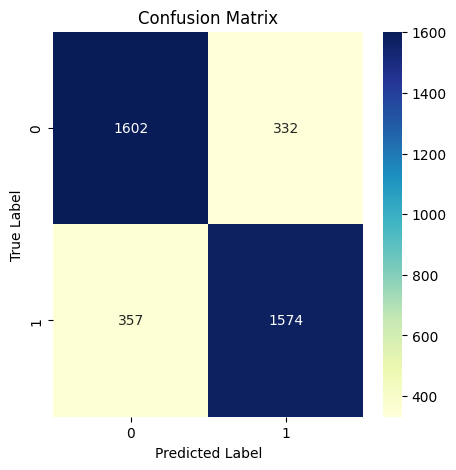

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_lr.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)



# Decision Tree Classifier

In [ ]:
model_tree = tree.fit(X_train, y_train)

In [ ]:
train_pred = model_tree.predict(X_train)
test_pred = model_tree.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7727
           1       1.00      1.00      1.00      7730

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1934
           1       0.97      0.98      0.97      1931

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted avg       0.97      0.97      0.97      3865

--------------------
Test ROC AUC score: 0.9749043660903015
--------------------


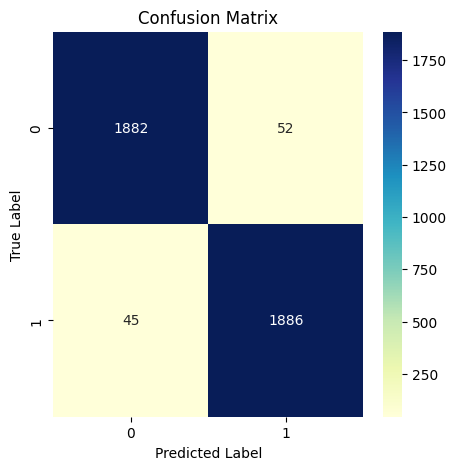

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_tree.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

## GridSearchCV on Decision Tree Classifier

Because the decision tree is overfitting the data.

In [ ]:
params = {'max_depth': [12,15, 20, None],
          'min_samples_leaf': [2, 1]}

In [ ]:
tree_prun = DecisionTreeClassifier()

In [ ]:
hcv = GridSearchCV(tree_prun, param_grid = params, scoring = 'roc_auc')
hcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [12, 15, 20, None],
                         'min_samples_leaf': [2, 1]},
             scoring='roc_auc')

In [ ]:
hcv.best_score_

0.9783009466369702

In [ ]:
hcv.best_params_

{'max_depth': 12, 'min_samples_leaf': 2}

## Implementation of best hyperparameters on decision tree classifier

In [ ]:
tree1 = DecisionTreeClassifier(max_depth= 12, min_samples_leaf= 2)
tree1 = tree1.fit(X_train, y_train)

In [ ]:
train_pred = tree1.predict(X_train)
test_pred = tree1.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7727
           1       0.99      0.98      0.99      7730

    accuracy                           0.99     15457
   macro avg       0.99      0.99      0.99     15457
weighted avg       0.99      0.99      0.99     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1934
           1       0.97      0.96      0.96      1931

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

--------------------
Test ROC AUC score: 0.9824755512974239
--------------------


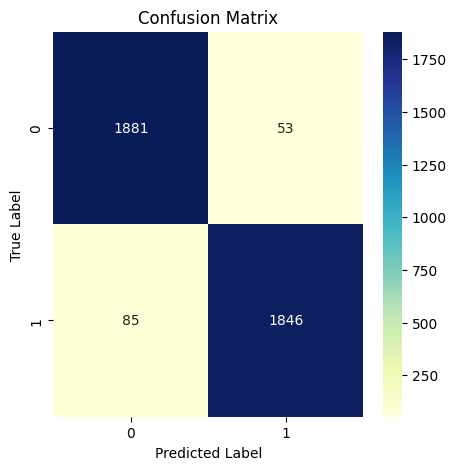

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = tree1.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

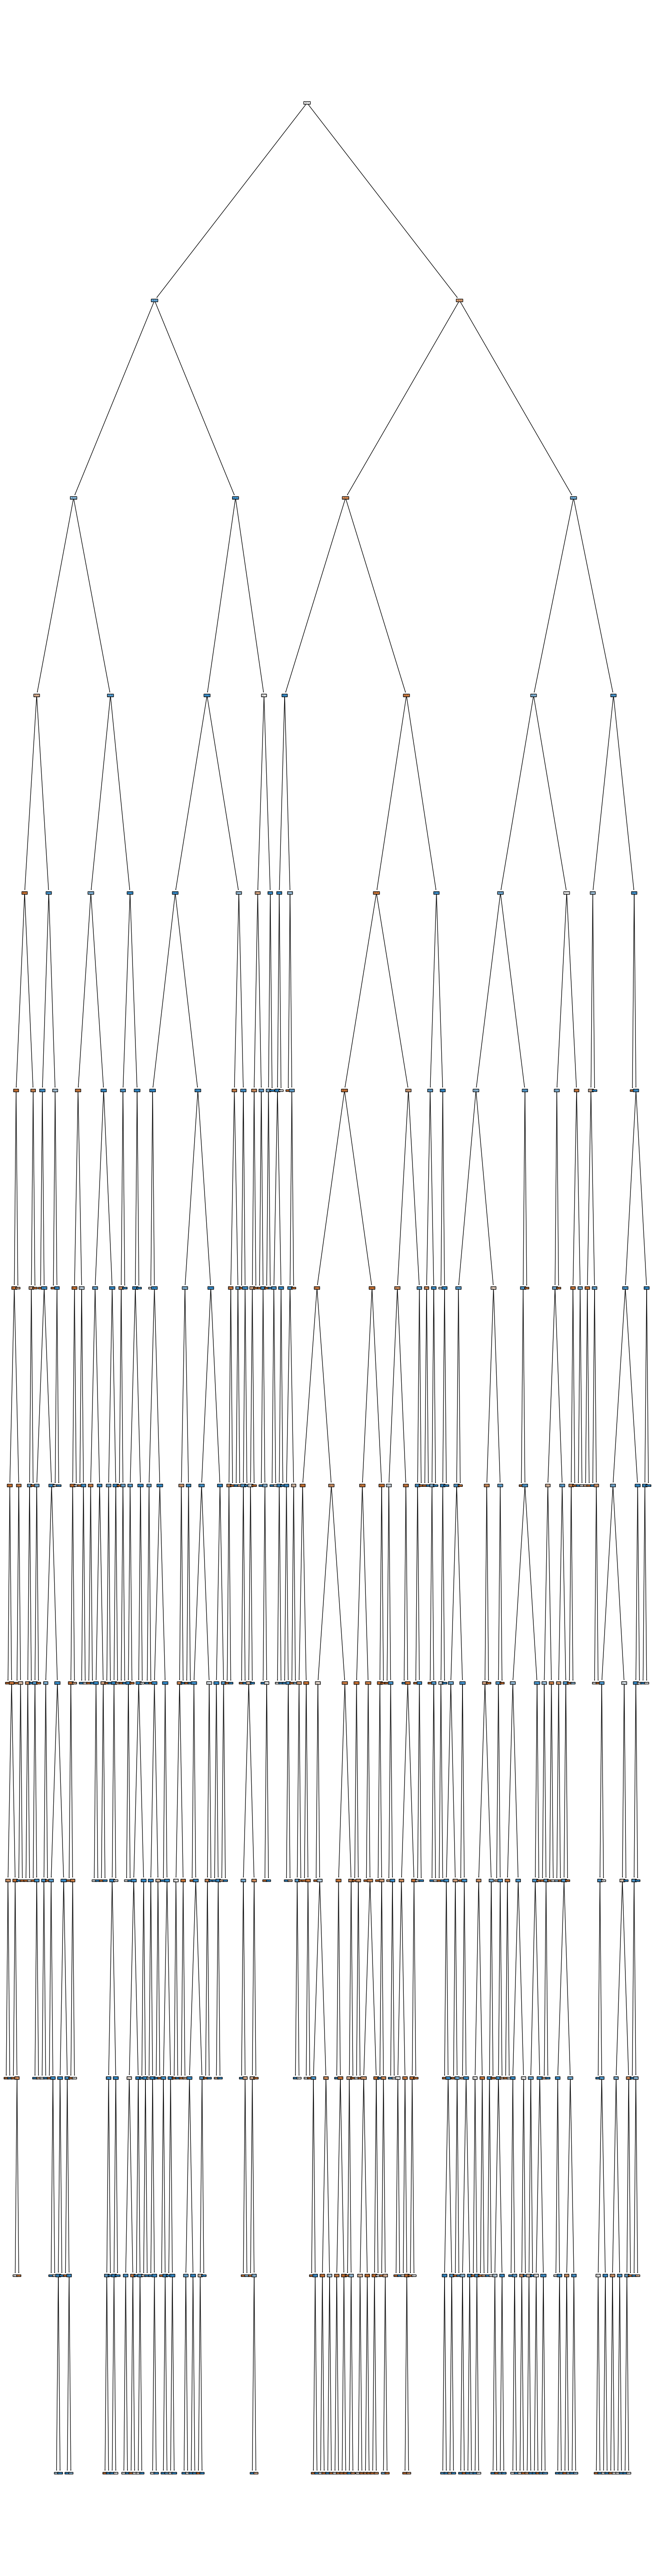

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 80))
plot_tree(tree1, filled=True, rounded=True)
plt.show()


In [ ]:
from sklearn.tree import export_text
print(export_text(tree1, feature_names = list(X_train.columns)))

|--- Rotational speed [rpm] <= -0.54
|   |--- Air temperature [K] <= 0.47
|   |   |--- Torque [Nm] <= 0.99
|   |   |   |--- Tool wear [min] <= 0.87
|   |   |   |   |--- Air temperature [K] <= 0.34
|   |   |   |   |   |--- Tool wear [min] <= 0.87
|   |   |   |   |   |   |--- Rotational speed [rpm] <= -0.56
|   |   |   |   |   |   |   |--- Air temperature [K] <= 0.17
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Air temperature [K] >  0.17
|   |   |   |   |   |   |   |   |--- Tool wear [min] <= -0.80
|   |   |   |   |   |   |   |   |   |--- Tool wear [min] <= -0.81
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Tool wear [min] >  -0.81
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Tool wear [min] >  -0.80
|   |   |   |   |   |   |   |   |   |--- Rotational speed [rpm] <= -0.57
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   | 

## Bar Chart representing the feature importance in decision tree

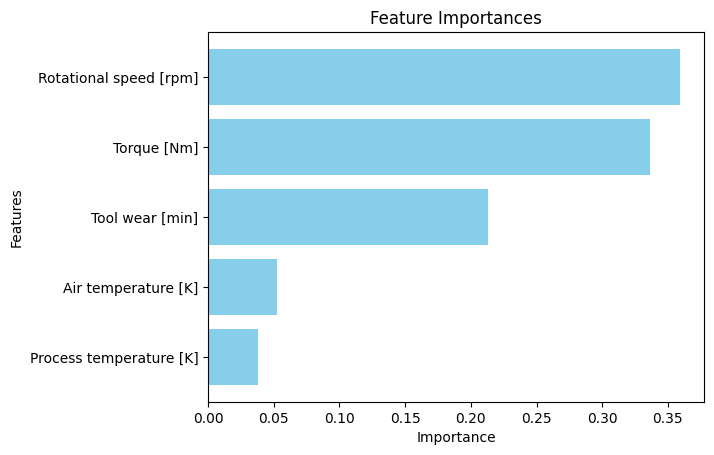

In [ ]:
importance_df = pd.DataFrame({"Features": X_train.columns, "Importance": tree1.feature_importances_})
importance_df.sort_values("Importance", ascending = True, inplace = True)
plt.barh(importance_df['Features'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(oob_score = True)
model_rf =  rf.fit(X_train, y_train)
train_pred = model_rf.predict(X_train)
test_pred = model_rf.predict(X_test)
oob_score = rf.oob_score_
print(f"Out-of-bag score: {oob_score}")

Out-of-bag score: 0.9821440124215566


classification report for training data is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7727
           1       1.00      1.00      1.00      7730

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1934
           1       0.98      0.99      0.98      1931

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

--------------------
Test ROC AUC score: 0.9990448658661784
--------------------


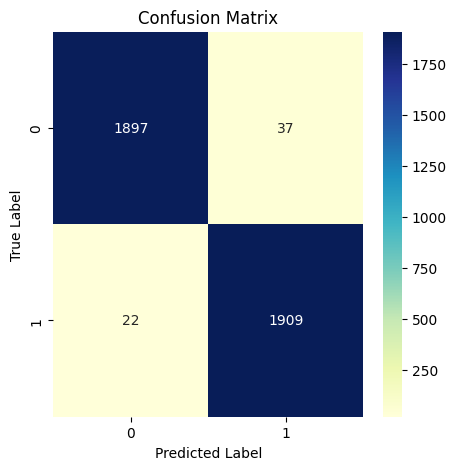

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_rf.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

## Gradient Boosting Classifier

In [ ]:
model_gb =  gb.fit(X_train, y_train)
train_pred = model_gb.predict(X_train)
test_pred = model_gb.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7727
           1       0.94      0.97      0.96      7730

    accuracy                           0.96     15457
   macro avg       0.96      0.96      0.96     15457
weighted avg       0.96      0.96      0.96     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1934
           1       0.95      0.97      0.96      1931

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

--------------------
Test ROC AUC score: 0.9883688922425543
--------------------


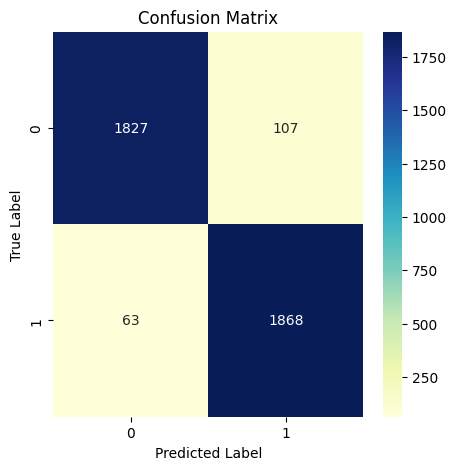

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_gb.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

# Support Vector Machine

In [ ]:
svc = SVC(probability = True)
model_svc =  svc.fit(X_train, y_train)
train_pred = model_svc.predict(X_train)
test_pred = model_svc.predict(X_test)

classification report for training data is:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      7727
           1       0.91      0.96      0.94      7730

    accuracy                           0.93     15457
   macro avg       0.94      0.93      0.93     15457
weighted avg       0.94      0.93      0.93     15457

--------------------
classification report for testing data is:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1934
           1       0.92      0.95      0.94      1931

    accuracy                           0.94      3865
   macro avg       0.94      0.94      0.94      3865
weighted avg       0.94      0.94      0.94      3865

--------------------
Test ROC AUC score: 0.9831171272392902
--------------------


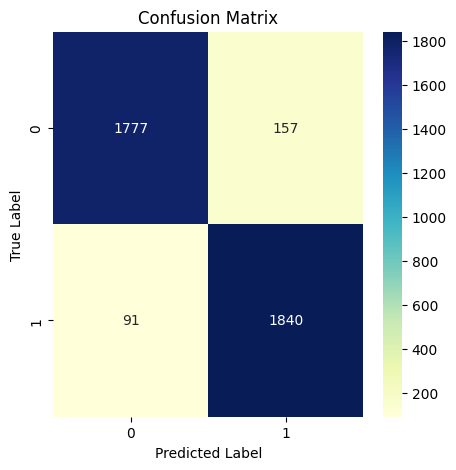

In [ ]:
print(f"classification report for training data is:\n {classification_report(y_train, train_pred)}")

print("-" *20)
print(f"classification report for testing data is:\n {classification_report(y_test, test_pred)}")

print("-" *20)
test_prob = model_svc.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_prob)
print(f"Test ROC AUC score: {test_roc_auc}")

print("-" *20)
plot_confusion(y_test, test_pred)

train_accuracy_list.append(accuracy_score(y_train, train_pred))
test_accuracy_list.append(accuracy_score(y_test, test_pred))
roc_auc_list.append(test_roc_auc)

## Error Analysis

In [ ]:
df_errors['train_accuracy'] = train_accuracy_list
df_errors['test_accuracy'] = test_accuracy_list
df_errors['roc_auc'] = roc_auc_list

In [ ]:
df_errors

,Algorithms,train_accuracy,test_accuracy,roc_auc
0,Logistic Regression,0.830562,0.821734,0.908022
1,Decision Tree Classifier,1.000000,0.974903,0.974904
2,Prunned Decision Tree classifier,0.987837,0.964295,0.982476
3,Random forest classifier,1.000000,0.984994,0.999012
4,Gradient boosting Classifier,0.957883,0.956016,0.988369
5,Support Vector Classifier,0.934205,0.935834,0.983117


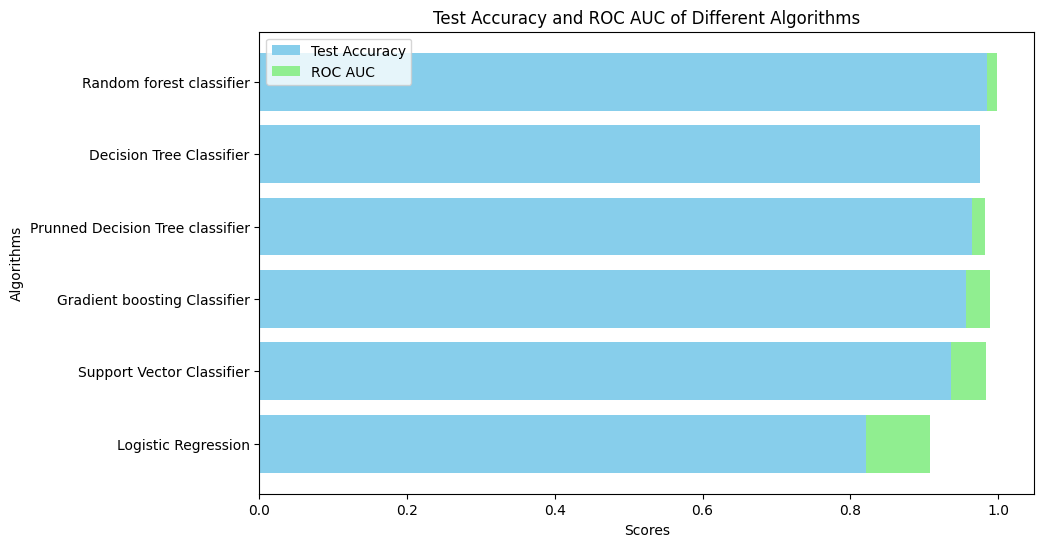

In [ ]:
# Plotting the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_errors.sort_values("test_accuracy", ascending = True, inplace = True)

# Plotting test accuracy
ax.barh(df_errors['Algorithms'], df_errors['test_accuracy'], color='skyblue', label='Test Accuracy')

# Plotting ROC AUC on top of the test accuracy bars
ax.barh(df_errors['Algorithms'], df_errors['roc_auc'] - df_errors['test_accuracy'],
        left=df_errors['test_accuracy'], color='lightgreen', label='ROC AUC')

# Adding labels and title
ax.set_xlabel('Scores')
ax.set_ylabel('Algorithms')
ax.set_title('Test Accuracy and ROC AUC of Different Algorithms')
ax.legend()

plt.show()

<b> Observations: </b>
<ul>
    <li>The accuracy of the Random Forest classifier is higher than that of any other algorithm.</li>
    <li>In the case of imbalanced data, it is best to consider the ROC AUC score, which is also high for the Random Forest classifier and the Gradient Boosting classifier.</li>
    <li>The accuracy and ROC AUC score achieved by Logistic Regression are poorer compared to the other models.</li>
</ul>








# Conclusion
In conclusion, our project on predictive maintenance for milling machines using statistical machine learning algorithms has shown promising results in reducing maintenance costs and enhancing operational efficiency. The combination of Random Forest, Gradient Boosting, and Pruned Decision Tree models has proven effective in accurately predicting maintenance needs.